In [0]:
!pip install -q tf-nightly

In [3]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

print("Tensorflow Version: {}".format(tf.__version__))
print("Eager Mode: {}".format(tf.executing_eagerly()))
print("GPU {} available.".format("is" if tf.config.experimental.list_physical_devices("GPU") else "not"))

Tensorflow Version: 2.2.0-dev20200204
Eager Mode: True
GPU is available.


# Data Preprocessing

In [5]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images.shape, train_labels.shape

((50000, 32, 32, 3), (50000, 1))

In [0]:
train_images = train_images / 255.0
test_images = test_images / 255.0

# Verify the Dataset

In [0]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

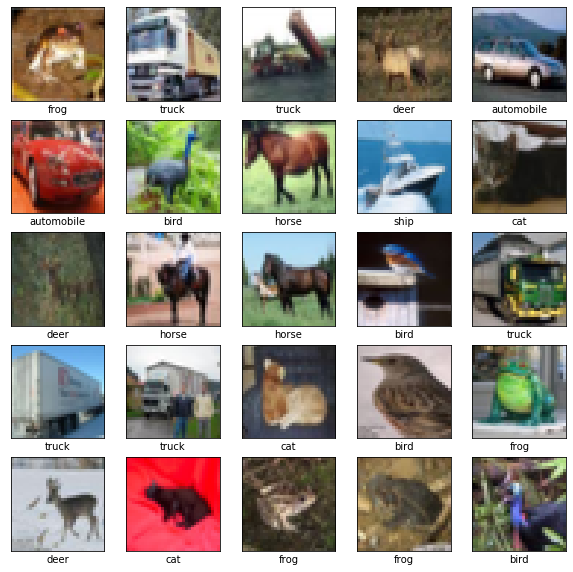

In [9]:
plt.figure(figsize=(10, 10))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i][0]])
plt.show()

# Build a CNN Model

The new feature map:

$$\frac{feature\_size + 2 * pad - kernel\_size}{strides} + 1$$

In [0]:
def build_model():
  def _model(inputs):
    x = layers.Conv2D(filters=32, kernel_size=(3, 3), activation='elu')(inputs) # [None, 30, 30, 32]
    x = layers.MaxPool2D()(x) # [None, 15, 15, 32]
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='elu')(x) # [None, 13, 13, 64]
    x = layers.MaxPool2D()(x) # [None, 6, 6, 64]
    x = layers.Conv2D(filters=64, kernel_size=(3, 3), activation='elu')(x) # [None, 4, 4, 64]
    x = layers.Flatten()(x)  # [None, 4*4*64]
    x = layers.Dense(units=64, activation='elu')(x)
    class_prob = layers.Dense(units=10, activation='softmax')(x)
    return class_prob
  
  inputs = tf.keras.Input(shape=(32, 32, 3))
  outputs = _model(inputs)
  model = tf.keras.Model(inputs, outputs)
  return model

In [15]:
model = build_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0     

# Train the Model

In [0]:
model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy, 
              optimizer=tf.keras.optimizers.Adam(),
              metrics=[tf.keras.metrics.sparse_categorical_accuracy])

In [20]:
history = model.fit(train_images, train_labels, epochs=10, 
                    validation_data=(test_images, test_labels))

Train on 50000 samples, validate on 10000 samples
Epoch 1/10
50000/50000 [==============================] - 7s 140us/sample - loss: 0.7761 - sparse_categorical_accuracy: 0.7305 - val_loss: 0.9143 - val_sparse_categorical_accuracy: 0.6981
Epoch 2/10
50000/50000 [==============================] - 6s 130us/sample - loss: 0.7084 - sparse_categorical_accuracy: 0.7532 - val_loss: 0.8652 - val_sparse_categorical_accuracy: 0.7061
Epoch 3/10
50000/50000 [==============================] - 6s 128us/sample - loss: 0.6436 - sparse_categorical_accuracy: 0.7749 - val_loss: 0.8933 - val_sparse_categorical_accuracy: 0.7035
Epoch 4/10
50000/50000 [==============================] - 7s 133us/sample - loss: 0.5894 - sparse_categorical_accuracy: 0.7934 - val_loss: 0.8911 - val_sparse_categorical_accuracy: 0.7093
Epoch 5/10
50000/50000 [==============================] - 7s 137us/sample - loss: 0.5342 - sparse_categorical_accuracy: 0.8107 - val_loss: 0.9507 - val_sparse_categorical_accuracy: 0.7074
Epoch 6/10

# Evaluate the Model

In [21]:
history.history.keys()

dict_keys(['loss', 'sparse_categorical_accuracy', 'val_loss', 'val_sparse_categorical_accuracy'])

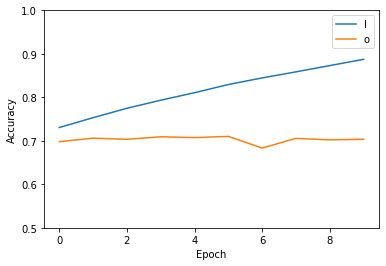

In [22]:
plt.plot(history.history['sparse_categorical_accuracy'], label='accuracy')
plt.plot(history.history['val_sparse_categorical_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend('lower right')
plt.show()

In [23]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print(test_loss, test_acc)

10000/10000 - 1s - loss: 1.1994 - sparse_categorical_accuracy: 0.7036
1.1994191349029542 0.7036
